In [23]:
import os
from pathlib import Path
import sys
import time
from functools import partial
from tqdm import tqdm

pwd = Path(os.getcwd())
sys.path.append(str(pwd.parent.parent / "gym-checkers-for-thai"))

In [24]:
from checkers.agents.baselines import play_a_game, RandomPlayer
from checkers.game import Checkers
from checkers.agents import Player
from checkers.agents.alpha_beta import MinimaxPlayer, first_order_adv

from player import GADQNPlayer
from model import DQN

import pygad
import pygad.torchga

import numpy as np

In [35]:
def run_experiment(model, n_matches=10, max_game_len=100, time_limit=10):
    n_wins, n_draws, n_losses = 0, 0, 0
    stime = time.time()

    # delete after end the loop
    looper = tqdm(range(n_matches), unit="matches", leave=False)
    for i in looper:
        ch = Checkers()

        # GA tuned model function
        black_player = GADQNPlayer('black', model=model)

        # Random player function
        white_player = RandomPlayer('white', seed=i)

        # Minimax player function
        # white_player = MinimaxPlayer('white', 
        #                              partial(first_order_adv, 'white', 200, 100, 50, 10),
        #                              search_depth=3)
        

        #modify this function to put our RL model as white
        winner = play_a_game(ch, black_player.next_move, white_player.next_move, max_game_len, is_show_detail=False)

        # Keep scores
        n_wins += 1 if winner == 'black' else 0
        n_draws += 1 if winner is None else 0
        n_losses += 1 if winner == 'white' else 0

        looper.set_postfix(
            wins=n_wins,
            draws=n_draws,
            losses=n_losses,
        )
        
        if time.time() - stime > time_limit*60:
            break
    
    return n_wins, n_draws, n_losses

In [36]:
def on_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed), end=": ")
    print("Best fitness = {fitness}".format(fitness=ga_instance.best_solution()[1]))

def on_fitness(ga_instance, population_fitness):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed), end=": ")
    print("Population fitness = {fitness}".format(fitness=population_fitness))

In [37]:
def fitness_func(ga_instance, solution, solution_idx):

    model = DQN()
    model_weights_dict = pygad.torchga.model_weights_as_dict(model=model, weights_vector=solution)
    model.load_state_dict(model_weights_dict)

    n_wins, n_draws, n_losses = run_experiment(model, n_matches=10, max_game_len=100, time_limit=2)

    return n_wins/(n_wins+n_draws+n_losses)

In [38]:
torch_ga = pygad.torchga.TorchGA(model=DQN(),
                                 num_solutions=8)

ga_instance = pygad.GA(num_generations=50,
                       num_parents_mating=5,
                       initial_population = torch_ga.population_weights,
                       fitness_func=fitness_func,
                       parent_selection_type="sss",
                       crossover_type="single_point",
                       mutation_type="random",
                       mutation_percent_genes=10,
                       keep_parents=-1,
                       on_generation=on_generation,
                       on_fitness=on_fitness)

In [39]:
ga_instance.run()

Generation = 0: Population fitness = [0.6 0.4 0.4 0.7 0.8 0.5 0.6 0.4]


Generation = 1: 

Best fitness = 0.8
Generation = 1: Population fitness = [0.8 0.5 0.5 0.2 0.3 0.3 0.3 0.7]


Generation = 2: 

Best fitness = 0.9
Generation = 2: Population fitness = [0.8 0.5 0.9 0.4 0.4 0.3 0.4 0.7]


Generation = 3: 

Best fitness = 0.9
Generation = 3: Population fitness = [0.9 0.4 0.7 0.5 0.4 0.8 0.9 0.4]


Generation = 4: 

Best fitness = 0.9
Generation = 4: Population fitness = [0.9 0.6 0.9 0.4 0.5 0.4 0.9 0.6]


Generation = 5: 

Best fitness = 0.9
Generation = 5: Population fitness = [0.9 0.7 0.6 0.8 0.7 0.7 0.8 0.7]


Generation = 6: 

Best fitness = 1.0
Generation = 6: Population fitness = [0.9 0.5 0.5 0.7 0.6 0.8 0.9 1. ]


Generation = 7: 

Best fitness = 1.0
Generation = 7: Population fitness = [1.  0.6 0.8 0.6 0.9 0.8 0.7 0.8]


Generation = 8: 

Best fitness = 1.0
Generation = 8: Population fitness = [1.  0.8 0.9 0.8 1.  0.8 0.7 0.7]


Generation = 9: 

Best fitness = 1.0
Generation = 9: Population fitness = [1.  0.8 0.8 0.8 0.7 0.8 0.7 0.9]


Generation = 10: 

Best fitness = 1.0
Generation = 10: Population fitness = [1.  0.7 0.9 0.8 0.4 0.9 0.8 0.5]


Generation = 11: 

Best fitness = 1.0
Generation = 11: Population fitness = [1.  0.8 0.7 0.7 0.6 0.6 0.6 0.8]


Generation = 12: 

Best fitness = 1.0
Generation = 12: Population fitness = [1.  0.7 0.8 0.8 0.7 0.9 0.8 0.6]


Generation = 13: 

Best fitness = 1.0
Generation = 13: Population fitness = [1.  0.7 1.  0.8 0.6 0.5 0.7 0.8]


Generation = 14: 

Best fitness = 1.0
Generation = 14: Population fitness = [1.  0.8 0.8 1.  0.5 0.8 0.7 0.8]


Generation = 15: 

Best fitness = 1.0
Generation = 15: Population fitness = [1.  0.5 0.7 0.7 0.5 0.9 0.7 0.8]


Generation = 16: 

Best fitness = 1.0
Generation = 16: Population fitness = [1.  0.9 0.8 0.6 0.8 0.5 0.7 0.9]


Generation = 17: 

Best fitness = 1.0
Generation = 17: Population fitness = [1.  0.9 1.  0.9 0.6 0.6 0.6 0.7]


Generation = 18: 

Best fitness = 1.0
Generation = 18: Population fitness = [1.  0.8 0.4 0.8 0.8 0.8 1.  0.7]


Generation = 19: 

Best fitness = 1.0
Generation = 19: Population fitness = [1.  0.8 0.6 0.9 0.8 0.9 0.7 0.9]


Generation = 20: 

Best fitness = 1.0
Generation = 20: Population fitness = [1.  0.7 0.6 0.7 0.2 0.7 0.8 0.8]


Generation = 21: 

Best fitness = 1.0
Generation = 21: Population fitness = [1.  0.9 0.8 0.5 0.9 0.8 0.9 0.6]


Generation = 22: 

Best fitness = 1.0
Generation = 22: Population fitness = [1.  1.  0.6 0.7 0.8 0.8 0.8 0.7]


Generation = 23: 

Best fitness = 1.0
Generation = 23: Population fitness = [1.  0.7 0.8 0.7 1.  0.6 0.9 0.8]


Generation = 24: 

Best fitness = 1.0
Generation = 24: Population fitness = [1.  0.8 0.7 0.7 0.6 1.  0.9 0.7]


Generation = 25: 

Best fitness = 1.0
Generation = 25: Population fitness = [1.  0.9 0.7 0.9 0.9 0.2 0.9 1. ]


Generation = 26: 

Best fitness = 1.0
Generation = 26: Population fitness = [1.  0.8 1.  0.8 0.9 1.  0.8 0.6]


Generation = 27: 

Best fitness = 1.0
Generation = 27: Population fitness = [1.  0.8 0.9 1.  0.9 0.6 0.9 0.8]


Generation = 28: 

Best fitness = 1.0
Generation = 28: Population fitness = [1.  0.7 1.  0.8 0.8 0.9 0.8 0.8]


Generation = 29: 

Best fitness = 1.0
Generation = 29: Population fitness = [1.  0.9 0.7 1.  0.8 0.8 0.9 1. ]


Generation = 30: 

Best fitness = 1.0
Generation = 30: Population fitness = [1.  0.3 0.7 0.8 0.8 1.  0.7 0.7]


Generation = 31: 

Best fitness = 1.0
Generation = 31: Population fitness = [1.  1.  0.9 0.7 0.8 0.5 0.8 0.6]


Generation = 32: 

Best fitness = 1.0
Generation = 32: Population fitness = [1.  0.8 0.6 0.9 0.7 0.5 0.7 0.8]


Generation = 33: 

Best fitness = 1.0
Generation = 33: Population fitness = [1.  0.8 0.8 0.9 0.6 0.8 0.8 1. ]


Generation = 34: 

Best fitness = 1.0
Generation = 34: Population fitness = [1.  0.8 0.8 0.7 0.8 0.9 1.  0.5]


Generation = 35: 

Best fitness = 1.0
Generation = 35: Population fitness = [1.  0.9 1.  0.9 0.9 0.9 1.  0.9]


Generation = 36: 

Best fitness = 1.0
Generation = 36: Population fitness = [1.  0.9 0.8 0.7 0.8 0.7 0.8 0.9]


Generation = 37: 

Best fitness = 1.0
Generation = 37: Population fitness = [1.  1.  0.9 0.8 0.8 0.7 1.  0.8]


Generation = 38: 

Best fitness = 1.0
Generation = 38: Population fitness = [1.  0.8 0.8 0.8 0.7 1.  0.8 0.8]


Generation = 39: 

Best fitness = 1.0
Generation = 39: Population fitness = [1.  0.9 1.  0.8 0.8 1.  1.  0.9]


Generation = 40: 

Best fitness = 1.0
Generation = 40: Population fitness = [1.  1.  1.  1.  0.7 0.7 1.  0.7]


Generation = 41: 

Best fitness = 1.0
Generation = 41: Population fitness = [1.  0.9 0.8 0.8 0.8 1.  0.9 0.9]


Generation = 42: 

Best fitness = 1.0
Generation = 42: Population fitness = [1.  0.8 1.  0.9 1.  0.7 1.  1. ]


Generation = 43: 

Best fitness = 1.0
Generation = 43: Population fitness = [1.  0.8 0.7 0.9 0.9 0.7 0.9 0.9]


Generation = 44: 

Best fitness = 1.0
Generation = 44: Population fitness = [1.  0.9 0.9 1.  0.7 0.7 1.  0.8]


Generation = 45: 

Best fitness = 1.0
Generation = 45: Population fitness = [1.  0.9 0.4 0.9 0.8 0.9 0.9 0.8]


Generation = 46: 

Best fitness = 1.0
Generation = 46: Population fitness = [1.  0.9 1.  0.9 0.9 0.9 0.9 0.8]


Generation = 47: 

Best fitness = 1.0
Generation = 47: Population fitness = [1.  0.6 0.7 0.9 0.9 0.7 1.  0.9]


Generation = 48: 

Best fitness = 1.0
Generation = 48: Population fitness = [1.  0.9 0.9 0.9 0.5 0.7 0.9 0.9]


Generation = 49: 

Best fitness = 1.0
Generation = 49: Population fitness = [1.  0.6 1.  0.9 0.8 1.  0.9 1. ]


Generation = 50: 

Best fitness = 1.0


In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()

print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

100%|██████████| 20/20 [00:00<00:00, 164.03matches/s, draws=0, losses=14, wins=6]


Parameters of the best solution : [ 0.6176702   0.32421595 -1.02700485 ... -1.00554825 -0.5830738
  0.3827897 ]
Fitness value of the best solution = 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


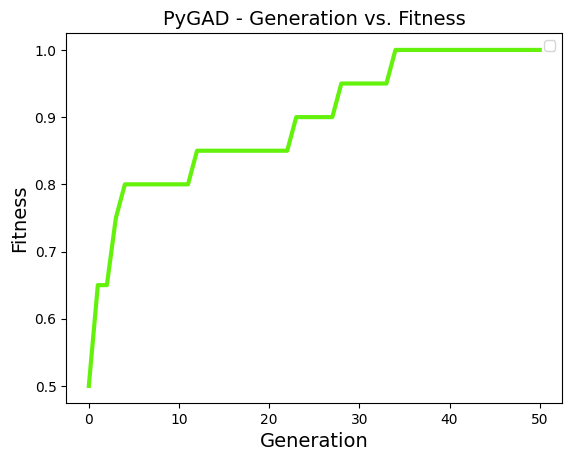

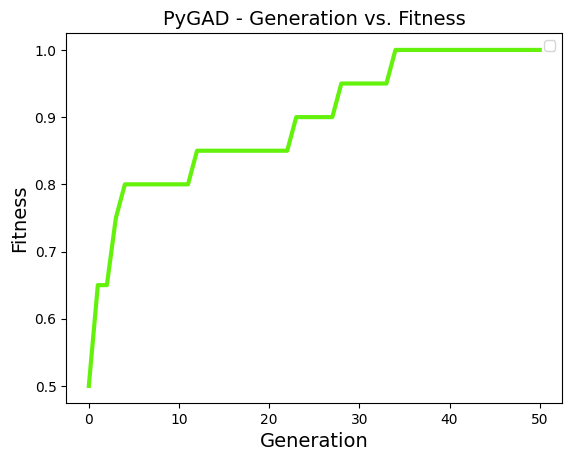

In [ ]:
ga_instance.plot_fitness()